In [1]:
from TradingView import Datafeed
import pandas as pd

Data = Datafeed()
prices_df = pd.DataFrame()

crypto_list = [('BTCUSD', 'COINBASE'),
               ('ETHUSD', 'COINBASE'),
               ('BNBUSD', 'BINANCE'),
               ('ADAUSD', 'BINANCE'),
               ('LUNAUSD', 'BINANCE')]

for crypto in crypto_list:
    prices_df[crypto[0]] = Data.daily_close(symbol=crypto[0], exchange=crypto[1], 
                                            date_start_str='2020/01/01', date_end_str='2022/01/01')


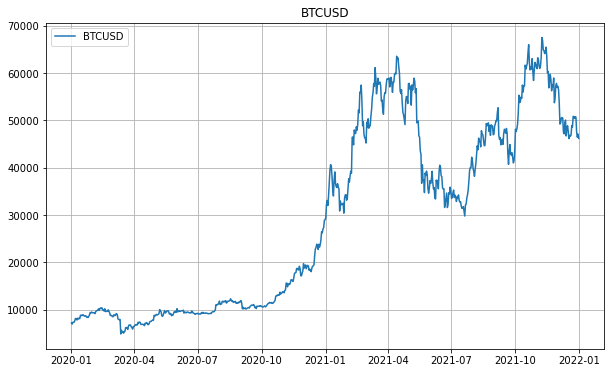

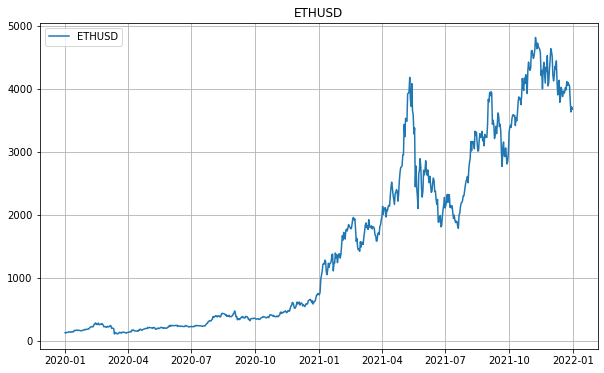

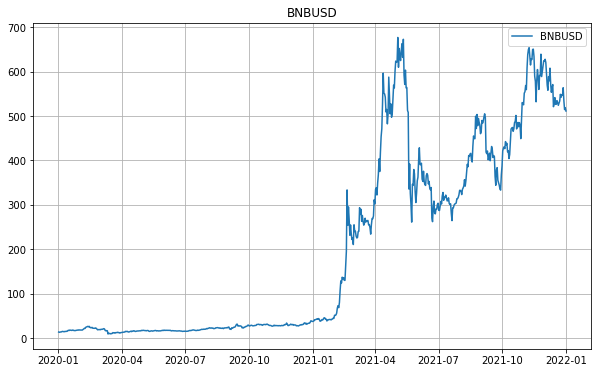

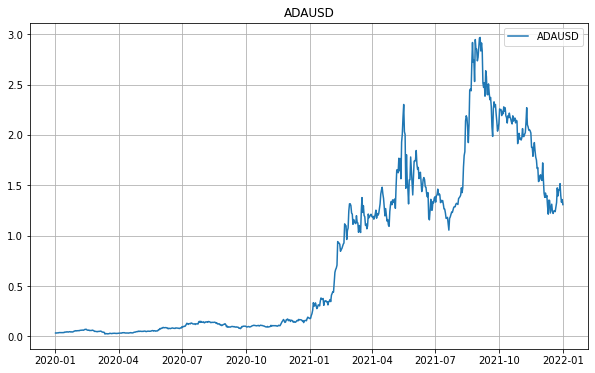

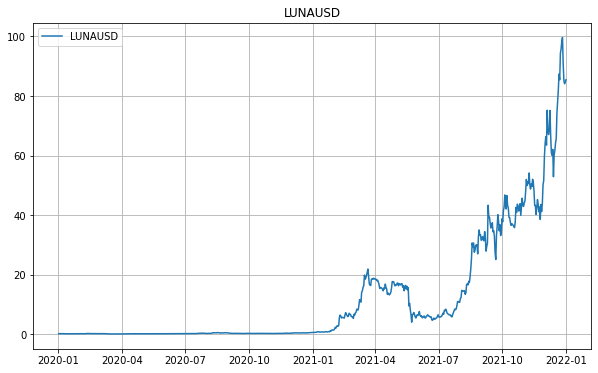

In [2]:
import matplotlib.pyplot as plt

for crypto in prices_df.columns:
    plt.figure(figsize = (10, 6))
    plt.plot(prices_df[crypto], label = crypto)
    plt.title(crypto)
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
from Cointegration import pair_selection_MSD
pair_selection_MSD(prices_df)

,MSD
pair,
"('ETHUSD', 'BNBUSD')",56.656220
"('ETHUSD', 'ADAUSD')",109.058555
"('BTCUSD', 'ETHUSD')",140.589720
"('BNBUSD', 'ADAUSD')",142.120388
"('BTCUSD', 'BNBUSD')",156.988805
"('BTCUSD', 'ADAUSD')",201.204526
"('ETHUSD', 'LUNAUSD')",225.226495
"('BNBUSD', 'LUNAUSD')",291.768085
"('ADAUSD', 'LUNAUSD')",428.187199


In [4]:
from Cointegration import cointegration_test
cointegration_test(prices_df, alpha=0.05)

,score,p-value,cointegration
pair,,,
"('ETHUSD', 'BNBUSD')",-3.307966,0.053650,False
"('BNBUSD', 'ADAUSD')",-2.868447,0.144875,False
"('ETHUSD', 'ADAUSD')",-2.083414,0.485040,False
"('BTCUSD', 'BNBUSD')",-2.048363,0.503365,False
"('BTCUSD', 'ADAUSD')",-1.787976,0.635544,False
"('BTCUSD', 'ETHUSD')",-1.568017,0.734198,False
"('BNBUSD', 'LUNAUSD')",-1.444200,0.781962,False
"('ETHUSD', 'LUNAUSD')",-1.192405,0.859879,False
"('ADAUSD', 'LUNAUSD')",-1.059120,0.891049,False


In [5]:
from Modeling import log_return

logReturn_df = log_return(prices_df).dropna()
logReturn_df

,BTCUSD,ETHUSD,BNBUSD,ADAUSD,LUNAUSD
datetime,,,,,
2020-01-02 08:00:00,-0.032485,-0.026305,-0.051826,-0.021853,-0.086719
2020-01-03 08:00:00,0.054558,0.056418,0.050335,0.048158,0.030211
2020-01-04 08:00:00,0.001931,-0.000224,0.011027,0.006154,0.087179
2020-01-05 08:00:00,0.000921,0.008684,0.017565,0.006888,-0.009071
2020-01-06 08:00:00,0.054144,0.063563,0.064059,0.073082,-0.042468
...,...,...,...,...,...
2021-12-27 08:00:00,-0.001655,-0.006730,0.030622,0.040382,-0.091775
2021-12-28 08:00:00,-0.064640,-0.062574,-0.053565,-0.080318,-0.064781
2021-12-29 08:00:00,-0.022803,-0.043939,-0.037762,-0.049827,-0.012919


In [6]:
from Modeling import return_spreads
return_spreads_df = return_spreads(prices_df)
return_spreads_df

,"('BTCUSD', 'ETHUSD')","('BTCUSD', 'BNBUSD')","('BTCUSD', 'ADAUSD')","('BTCUSD', 'LUNAUSD')","('ETHUSD', 'BNBUSD')","('ETHUSD', 'ADAUSD')","('ETHUSD', 'LUNAUSD')","('BNBUSD', 'ADAUSD')","('BNBUSD', 'LUNAUSD')","('ADAUSD', 'LUNAUSD')"
datetime,,,,,,,,,,
2020-01-01 08:00:00,7044.14,7160.671145,7174.296705,7174.097253,116.531145,130.156705,129.957253,13.625559,13.426108,-0.199452
2020-01-02 08:00:00,6818.21,6932.050998,6944.987425,6944.806587,113.840998,126.777425,126.596587,12.936426,12.755588,-0.180838
2020-01-03 08:00:00,7200.28,7320.811495,7334.415818,7334.230041,120.531495,134.135818,133.950041,13.604322,13.418545,-0.185777
2020-01-04 08:00:00,7214.49,7334.840275,7348.595607,7348.390004,120.350275,134.105607,133.900004,13.755331,13.549729,-0.205602
2020-01-05 08:00:00,7220.09,7341.365916,7355.365369,7355.162171,121.275916,135.275369,135.072171,13.999453,13.796255,-0.203198
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 08:00:00,46679.13,50154.070000,50716.254000,50626.851232,3474.940000,4037.124000,3947.721232,562.184000,472.781232,-89.402768
2021-12-28 08:00:00,43749.42,47008.790000,47541.691000,47457.874320,3259.370000,3792.271000,3708.454320,532.901000,449.084320,-83.816680
2021-12-29 08:00:00,42840.65,45956.740000,46469.909000,46387.118141,3116.090000,3629.259000,3546.468142,513.169000,430.378141,-82.790858


In [7]:
logReturn_spreads_df = log_return(return_spreads_df).dropna()
logReturn_spreads_df

,"('BTCUSD', 'ETHUSD')","('BTCUSD', 'BNBUSD')","('BTCUSD', 'ADAUSD')","('BTCUSD', 'LUNAUSD')","('ETHUSD', 'BNBUSD')","('ETHUSD', 'ADAUSD')","('ETHUSD', 'LUNAUSD')","('BNBUSD', 'ADAUSD')","('BNBUSD', 'LUNAUSD')","('ADAUSD', 'LUNAUSD')"
datetime,,,,,,,,,,
2020-01-02 08:00:00,-0.032599,-0.032448,-0.032485,-0.032483,-0.023356,-0.026306,-0.026200,-0.051900,-0.051232,-0.097970
2020-01-03 08:00:00,0.054523,0.054565,0.054558,0.054558,0.057108,0.056420,0.056461,0.050340,0.050668,0.026944
2020-01-04 08:00:00,0.001972,0.001914,0.001931,0.001929,-0.001505,-0.000225,-0.000374,0.011039,0.009729,0.101398
2020-01-05 08:00:00,0.000776,0.000889,0.000921,0.000921,0.007662,0.008685,0.008716,0.017592,0.018031,-0.011765
2020-01-06 08:00:00,0.053967,0.054125,0.054144,0.054147,0.063506,0.063561,0.063741,0.064037,0.065799,-0.063565
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 08:00:00,-0.001215,-0.002012,-0.001656,-0.001486,-0.012659,-0.006747,-0.004683,0.030596,0.055980,-0.093872
2021-12-28 08:00:00,-0.064819,-0.064765,-0.064639,-0.064640,-0.064043,-0.062568,-0.062523,-0.053494,-0.051422,-0.064520
2021-12-29 08:00:00,-0.020991,-0.022634,-0.022802,-0.022821,-0.044955,-0.043937,-0.044663,-0.037730,-0.042546,-0.012314


In [8]:
from Modeling import ForecastModel
from arch.univariate import *

Model1 = ForecastModel(logReturn_spreads_df["('ETHUSD', 'BNBUSD')"])
Model1.modelspec(vol=GARCH(1,0,1), dist=SkewStudent())
Model1.rollingForecasting(window=365, VaR_alpha=[0.2, 0.8])
Model1.result

,cond_mean,cond_var,VaR-20.0%,VaR-80.0%
datetime,,,,
2021-01-01 08:00:00,0.011475,0.002451,-0.019154,0.040677
2021-01-02 08:00:00,0.009526,0.002462,-0.020645,0.038177
2021-01-03 08:00:00,-0.002235,0.002457,-0.032904,0.026940
2021-01-04 08:00:00,-0.031903,0.005612,-0.076972,0.010469
2021-01-05 08:00:00,-0.001759,0.006157,-0.048527,0.042209
...,...,...,...,...
2021-12-27 08:00:00,0.005359,0.001851,-0.026765,0.037675
2021-12-28 08:00:00,0.005539,0.001791,-0.026040,0.037265
2021-12-29 08:00:00,0.008870,0.002071,-0.025790,0.043561
